# This document is used to determine what my Spotify Wrapped playlist will look like before it is released. I reuse this dashboard to check mine and others streaming history for the year to see if I can succesfully predict what will appear on my spotify wrapped. In addition, I've tapped into my entire streaming history to see what kind of things I've been listening to since I've been a spotify premium subscriber.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
stream = pd.concat([pd.read_json('/StreamingHistory0.json'),pd.read_json('/StreamingHistory1.json'),pd.read_json('/StreamingHistory2.json')])

In [ ]:
stream['secPlayed'] = stream['msPlayed'] / 1000

In [ ]:
import datetime

stream['endTime'] = pd.to_datetime(stream['endTime'])
stream = stream.loc[stream['endTime'].dt.year == 2023]
stream.head()

,endTime,artistName,trackName,msPlayed,secPlayed
8824,2023-01-01 01:23:00,Disco Lines,Baby Girl,111074,111.074
8825,2023-01-01 01:26:00,sped up nightcore,B.O.T.A. (Baddest Of Them All) [feat. Eliza Ro...,189316,189.316
8826,2023-01-01 01:28:00,INTERWORLD,METAMORPHOSIS - Sped Up,110936,110.936
8827,2023-01-01 01:33:00,Teedra Moses,Be Your Girl (Kaytranada Edition),268087,268.087
8828,2023-01-01 01:36:00,Kordhell,Murder In My Mind - Sped Up,45878,45.878


In [ ]:
stream[['artistName','secPlayed']].groupby('artistName').sum().sort_values('secPlayed', ascending = False).head(10)

,secPlayed
artistName,
Bad Bunny,195088.699
The Marías,48141.852
Rauw Alejandro,43571.056
Turnstile,32119.847
Faye Webster,31295.064
Men I Trust,30473.520
ROSALÍA,29812.758
Drake,28507.270
Kali Uchis,22232.843


In [ ]:
stream[['secPlayed', 'trackName']].groupby('trackName').sum().sort_values('secPlayed', ascending = False).head(10)

,secPlayed
trackName,
La Jumpa,11695.846
Fade Into You,11577.322
Gato de Noche,9430.711
Moscow Mule,9266.922
All I Really Want Is You,8757.583
Tití Me Preguntó,8691.673
Spin Me Around,8659.674
It's Our Love,8467.387
Sure Thing,8331.364


In [ ]:
›#stream = stream[['artistName', 'secPlayed']].groupby('artistName').sum().sort_values('secPlayed', ascending = False).head(20)
stream['minutes'] = stream['secPlayed'] / 60
stream['hours'] = stream['minutes'] / 60
stream


,endTime,artistName,trackName,msPlayed,secPlayed,minutes,hours
8824,2023-01-01 01:23:00,Disco Lines,Baby Girl,111074,111.074,1.851233,0.030854
8825,2023-01-01 01:26:00,sped up nightcore,B.O.T.A. (Baddest Of Them All) [feat. Eliza Ro...,189316,189.316,3.155267,0.052588
8826,2023-01-01 01:28:00,INTERWORLD,METAMORPHOSIS - Sped Up,110936,110.936,1.848933,0.030816
8827,2023-01-01 01:33:00,Teedra Moses,Be Your Girl (Kaytranada Edition),268087,268.087,4.468117,0.074469
8828,2023-01-01 01:36:00,Kordhell,Murder In My Mind - Sped Up,45878,45.878,0.764633,0.012744
...,...,...,...,...,...,...,...
6713,2023-10-09 17:18:00,Ñengo Flow,Gato de Noche,227013,227.013,3.783550,0.063059
6714,2023-10-09 17:21:00,Bad Bunny,DÁKITI,205090,205.090,3.418167,0.056969
6715,2023-10-09 17:21:00,Bad Bunny,Efecto,9241,9.241,0.154017,0.002567
6716,2023-10-09 17:24:00,Bad Bunny,UN PREVIEW,165582,165.582,2.759700,0.045995


In [ ]:
stream.sort_values("endTime", ascending = False)

,endTime,artistName,trackName,msPlayed,secPlayed,minutes,hours
6717,2023-10-09 17:32:00,Bad Bunny,UN PREVIEW,165582,165.582,2.759700,0.045995
6716,2023-10-09 17:24:00,Bad Bunny,UN PREVIEW,165582,165.582,2.759700,0.045995
6715,2023-10-09 17:21:00,Bad Bunny,Efecto,9241,9.241,0.154017,0.002567
6714,2023-10-09 17:21:00,Bad Bunny,DÁKITI,205090,205.090,3.418167,0.056969
6713,2023-10-09 17:18:00,Ñengo Flow,Gato de Noche,227013,227.013,3.783550,0.063059
...,...,...,...,...,...,...,...
8829,2023-01-01 01:36:00,Oliver Tree,Miss You - Sped Up Version,171701,171.701,2.861683,0.047695
8827,2023-01-01 01:33:00,Teedra Moses,Be Your Girl (Kaytranada Edition),268087,268.087,4.468117,0.074469
8826,2023-01-01 01:28:00,INTERWORLD,METAMORPHOSIS - Sped Up,110936,110.936,1.848933,0.030816
8825,2023-01-01 01:26:00,sped up nightcore,B.O.T.A. (Baddest Of Them All) [feat. Eliza Ro...,189316,189.316,3.155267,0.052588


In [ ]:
stream['date'] = pd.to_datetime(stream['endTime']).dt.date

<Axes: xlabel='endTime'>

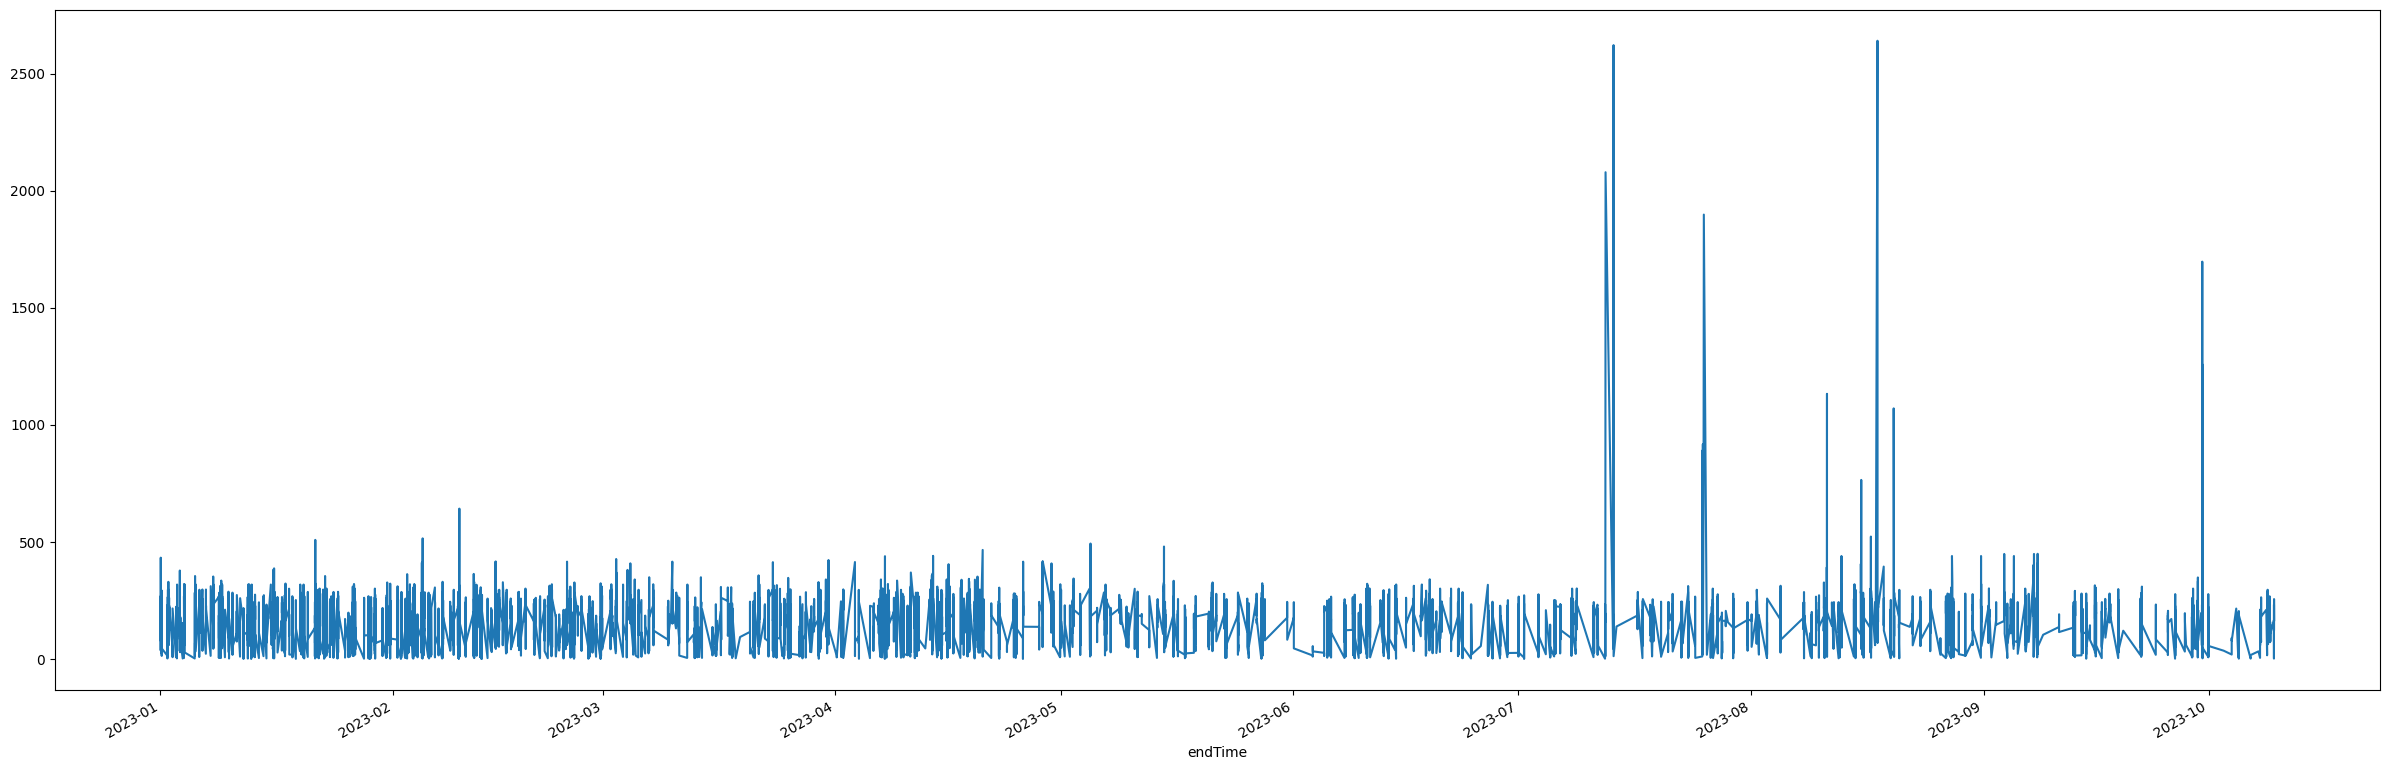

In [ ]:
stream[['endTime', 'secPlayed']].groupby('endTime').sum()['secPlayed'].plot.line(figsize=(30, 10))

In [ ]:
play = stream[['date','trackName', 'endTime']].groupby(['date','trackName']).count()
play[play['endTime'] > 10 ]

endTime
date       trackName                                                  
2022-03-25 Farewell Cheyenne (From "Once Upon a Time in th...       11
2022-05-02 Feel My Love                                             15
2022-06-10 Every 1's a Winner - Single Version                      17
           Give It To Me Baby                                       11
           Showdown                                                 11
2022-06-15 Me and Your Mama                                         11
2022-07-25 C-Side                                                   14
           Leave You Alone                                          12
2022-08-11 Thunderstorms and Neon Signs                             13
2022-08-17 It Almost Worked                                         23
2022-10-24 C-Side                                                   14
           Starting First Ending Last                               15
           Thunderstorms and Neon Signs                             11
2022-11-07 SelfCare - Demo                                          11

In [ ]:
sum(stream['minutes'])

25131.50373333309

In [ ]:
#with open('/content/YourLibrary.json') as f:
# data = json.load(f)
#print(data.keys())
#list_of_results = data['tracks']#["items"]
#list_of_results[0]

FileNotFoundError: ignored

In [ ]:
##len(data[0]['items'])#

#list_of_results = data['tracks']#["items"]
#list_of_artist_names = []
#list_of_artist_uri = []
#list_of_song_names = []
#list_of_song_uri = []
#list_of_durations_ms = []
#list_of_explicit = []
#list_of_albums = []
#list_of_popularity = []

#for result in list_of_results:
#    result["album"]
#    this_artists_name = result["artist"]
 #   list_of_artist_names.append(this_artists_name)
  #  this_artists_uri = result["uri"]
  # list_of_artist_uri.append(this_artists_uri)
  #  list_of_songs = result["track"]
  #  list_of_song_names.append(list_of_songs)
  #  song_uri = result["uri"]
  ##  list_of_song_uri.append(song_uri)
  #  #list_of_duration = result["duration_ms"]
  #  #list_of_durations_ms.append(list_of_duration)
  #  #song_explicit = result["explicit"]
  #3  #list_of_explicit.append(song_explicit)
  #3  this_album = result["album"]
  #3#  list_of_albums.append(this_album)
# 3   song_popularity = result["popularity"]
#    list_of_popularity.append(song_popularity)
# Convert the pulled content to a pandas df
#all_songs = pd.DataFrame(
#    {'artist': list_of_artist_names,
#     'artist_uri': list_of_artist_uri,
#     'song': list_of_song_names,
#     'song_uri': list_of_song_uri,
   #  'duration_ms': list_of_durations_ms,
  #   'explicit': list_of_explicit,
#     'album': list_of_albums,
 #    'popularity': list_of_popularity

#    })

In [ ]:
#all_songs

In [ ]:
#all_songs.groupby('artist').count().sort_values('song', ascending = False).head(20)

In [ ]:
#all_songs['song_uri'] = all_songs['song_uri'].str.slice(start=14)
#all_songs['artist_uri'] = all_songs['artist_uri'].str.slice(start=14)
#all_songs

In [ ]:
pan = [pd.read_json('/content/endsong_0.json'),pd.read_json('/content/endsong_1.json'),pd.read_json('/content/endsong_2.json'),pd.read_json('/content/endsong_3.json'),pd.read_json('/content/endsong_4.json'),pd.read_json('/content/endsong_5.json'),pd.read_json('/content/endsong_6.json'),pd.read_json('/content/endsong_7.json')]
stream2 = pd.concat(pan)
stream2

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2018-08-26T22:06:32Z,12148498989,"iOS 11.4.1 (iPhone9,2)",369520,US,66.87.118.144,unknown,"Symphony No. 2 in D, Op. 36: 4. Allegro molto",Ludwig van Beethoven,Beethoven: The Symphonies,...,None,None,None,trackdone,trackdone,False,NaN,False,1535320821998,False
1,2016-03-20T16:02:32Z,12148498989,"iOS 9.2.1 (iPhone8,1)",149600,US,174.71.187.3,unknown,I Am a Girlfriend,Nobunny,Love Visions,...,None,None,None,trackdone,trackdone,False,0.0,True,1,False
2,2019-02-03T21:24:50Z,12148498989,"iOS 12.1.2 (iPhone9,2)",367619,US,66.87.119.124,unknown,Pool Party Music,Mall Grab,Pool Party Music,...,None,None,None,trackdone,trackdone,False,NaN,False,1549228722265,False
3,2021-03-06T21:49:35Z,12148498989,Partner google cast_tv;Chromecast;;4.3.2--1.49...,258073,US,157.131.108.104,Mozilla%2F5.0%20(X11;%20Linux%20armv7l)%20Appl...,Rhymes Like Dimes,MF DOOM,Operation: Doomsday (Complete),...,None,None,None,backbtn,trackdone,False,NaN,False,0,False
4,2020-06-26T22:35:39Z,12148498989,"iOS 13.5.1 (iPhone12,3)",282520,US,174.204.199.145,unknown,Luck of Lucien,A Tribe Called Quest,People's Instinctive Travels and the Paths of ...,...,None,None,None,trackdone,trackdone,True,NaN,False,1593210656180,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,2016-07-09T18:55:43Z,12148498989,"iOS 9.3.2 (iPhone8,1)",1253,US,70.197.128.21,unknown,Riders on the Storm,The Doors,L.A. Woman,...,None,None,None,fwdbtn,fwdbtn,False,NaN,False,0,False
2930,2017-11-16T02:13:14Z,12148498989,"iOS 11.0.3 (iPhone9,2)",224906,US,24.130.153.101,unknown,Thinking Bout You,Flo Morrissey,"Gentlewoman, Ruby Man",...,None,None,None,trackdone,trackdone,False,NaN,False,1510798168320,False
2931,2019-09-09T02:35:18Z,12148498989,"iOS 12.4 (iPhone9,2)",4342,US,99.203.11.247,unknown,Why,Carly Simon,Soup for One,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1567996513633,False
2932,2016-07-30T18:39:07Z,12148498989,"iOS 9.3.2 (iPhone8,1)",2786,US,4.35.231.139,unknown,"Moves Like Jagger - Studio Recording From ""The...",Maroon 5,Hands All Over,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,0,False


In [ ]:
stream2.groupby('master_metadata_album_artist_name').count().sort_values('ts', ascending= False).head(20)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
master_metadata_album_artist_name,,,,,,,,,,,,,,,,,,,,
Mac DeMarco,2876,2876,2876,2876,2876,2876,2875,2876,2876,2876,0,0,0,2876,2876,2876,234,2876,2876,2876
Kanye West,2571,2571,2571,2571,2571,2571,2515,2571,2571,2571,0,0,0,2571,2571,2571,89,2571,2571,2571
Frank Sinatra,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215,0,0,0,2215,2215,2215,11,2215,2215,2215
Earl Sweatshirt,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,0,0,0,1114,1114,1114,289,1114,1114,1114
A Tribe Called Quest,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,0,0,0,1101,1101,1101,4,1101,1101,1101
King Krule,1097,1097,1097,1097,1097,1097,1094,1097,1097,1097,0,0,0,1097,1097,1097,54,1097,1097,1097
Frank Ocean,1092,1092,1092,1092,1092,1092,1064,1092,1092,1092,0,0,0,1092,1092,1092,23,1092,1092,1092
"Tyler, The Creator",1074,1074,1074,1074,1074,1074,1071,1074,1074,1074,0,0,0,1074,1074,1074,92,1074,1074,1074
Kid Cudi,963,963,963,963,963,963,961,963,963,963,0,0,0,963,963,963,145,963,963,963


In [ ]:
stream2.ts.sort_values()

10452    2014-07-19T23:08:03Z
3216     2014-07-19T23:11:27Z
5862     2014-07-19T23:14:45Z
12666    2014-07-19T23:18:57Z
13050    2014-07-19T23:20:34Z
                 ...         
9271     2022-11-24T19:59:11Z
13622    2022-11-24T20:01:49Z
276      2022-11-24T20:03:57Z
10419    2022-11-24T20:06:41Z
7092     2022-11-24T20:18:27Z
Name: ts, Length: 115632, dtype: object

In [ ]:
stream2['artist name and song'] = stream2['master_metadata_album_artist_name'] + ' - '+ stream2['master_metadata_track_name']

In [ ]:
stream2[['artist name and song', 'ts']].groupby('artist name and song').count().sort_values('ts', ascending= False).head(20)

,ts
artist name and song,
Fly Golden Eagle - Tangible Intangible,232
Mac DeMarco - Another One,204
Kanye West - Flashing Lights,203
Mac DeMarco - Ode to Viceroy,202
Beach Fossils - Sleep Apnea,200
Only Real - Cadillac Girl,173
Frank Sinatra - Summer Wind,169
Skylar Spence - Private Caller,161
TV Girl - Not Allowed,156


In [ ]:
stream2['date'] = stream2.ts.str.extract(r'(\d\d\d\d-\d\d-\d\d)')

In [ ]:
streamaday = stream2[['date','ts']].groupby('date').count()#['ts'].plot.line(figsize=(20,10))


In [ ]:
streamaday.sort_values('ts', ascending = False)

,ts
date,
2016-07-16,1803
2016-04-26,1462
2016-06-29,1460
2016-03-20,1345
2016-10-21,1097
...,...
2020-11-07,1
2017-05-20,1
2021-12-20,1


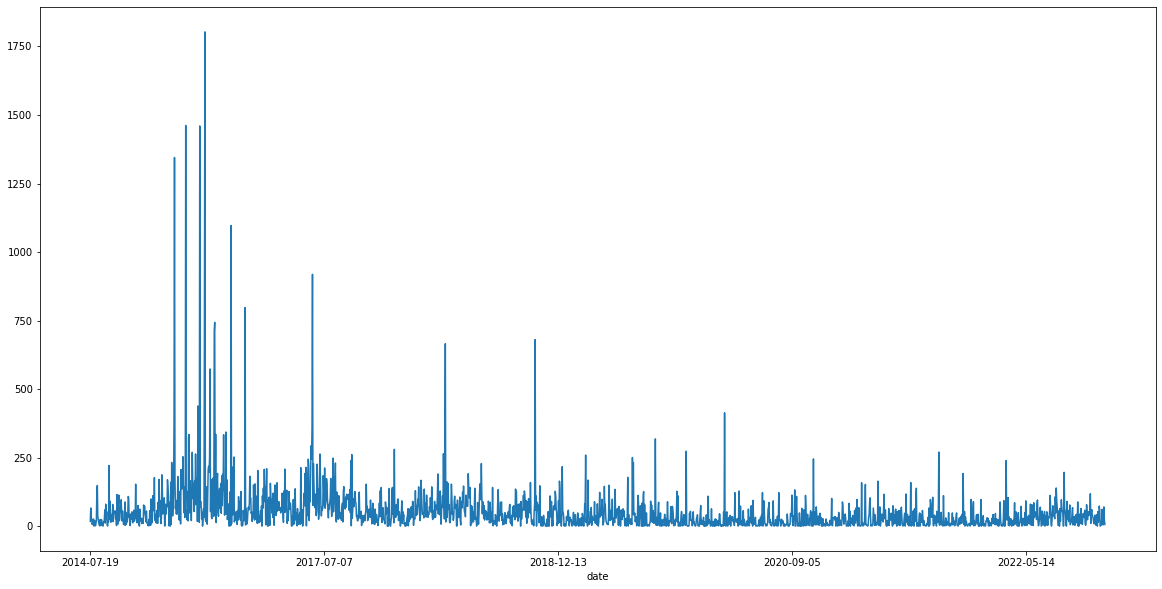

In [ ]:
streamaday['ts'].plot.line(figsize=(20,10))


In [ ]:
july16 = stream2[stream2['date']=='2016-07-16']
july16

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,artist name and song,date
138,2016-07-16T00:49:50Z,12148498989,"iOS 9.3.2 (iPhone8,1)",998,US,70.197.130.244,unknown,Contact,Daft Punk,Random Access Memories,...,None,fwdbtn,fwdbtn,False,NaN,True,1468192682134,False,Daft Punk - Contact,2016-07-16
192,2016-07-16T00:49:42Z,12148498989,"iOS 9.3.2 (iPhone8,1)",859,US,70.197.130.244,unknown,Camelblues,Mndsgn,Yawn Zen,...,None,fwdbtn,fwdbtn,False,NaN,True,1468123831315,False,Mndsgn - Camelblues,2016-07-16
209,2016-07-16T00:49:47Z,12148498989,"iOS 9.3.2 (iPhone8,1)",2600,US,70.197.130.244,unknown,I Don't Mind,Twerps,Range Anxiety,...,None,fwdbtn,fwdbtn,False,NaN,True,1468178390045,False,Twerps - I Don't Mind,2016-07-16
350,2016-07-16T22:06:21Z,12148498989,"iOS 9.3.2 (iPhone8,1)",201493,US,70.197.136.48,unknown,Give It Up,Pepper,Kona Town,...,None,trackdone,trackdone,False,NaN,True,1468693018655,False,Pepper - Give It Up,2016-07-16
390,2016-07-16T00:49:43Z,12148498989,"iOS 9.3.2 (iPhone8,1)",812,US,70.197.130.244,unknown,Make Her Say,Kid Cudi,Man On The Moon: The End Of Day,...,None,fwdbtn,fwdbtn,False,NaN,True,1468124187705,False,Kid Cudi - Make Her Say,2016-07-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,2016-07-16T11:13:15Z,12148498989,"iOS 9.3.2 (iPhone8,1)",2438,US,70.197.136.196,unknown,Night Nurse,Gregory Isaacs,Night Nurse,...,None,fwdbtn,fwdbtn,False,NaN,True,1468651872781,False,Gregory Isaacs - Night Nurse,2016-07-16
2617,2016-07-16T00:49:42Z,12148498989,"iOS 9.3.2 (iPhone8,1)",882,US,70.197.130.244,unknown,Jane,Girlpool,Girlpool,...,None,fwdbtn,fwdbtn,False,NaN,True,1468124107851,False,Girlpool - Jane,2016-07-16
2702,2016-07-16T00:49:47Z,12148498989,"iOS 9.3.2 (iPhone8,1)",1184,US,70.197.130.244,unknown,2 Heads,Coleman Hell,Coleman Hell - EP,...,None,fwdbtn,fwdbtn,False,NaN,True,1468178373667,False,Coleman Hell - 2 Heads,2016-07-16
2711,2016-07-16T00:49:40Z,12148498989,"iOS 9.3.2 (iPhone8,1)",626,US,70.197.130.244,unknown,One Dance,Drake,Views,...,None,fwdbtn,fwdbtn,False,NaN,True,1468123322835,False,Drake - One Dance,2016-07-16


In [ ]:
july16[['artist name and song', 'ts']].groupby('artist name and song').count()

,ts
artist name and song,
2Pac - Life Goes On,2
A Tribe Called Quest - Can I Kick It?,2
A Tribe Called Quest - Check the Rhime,2
A Tribe Called Quest - Find a Way,2
Abhi The Nomad - Floors,6
...,...
alt-J - Hunger of the Pine,1
ayokay - Kings of Summer,11
bigott - The Jingle,2


In [ ]:
sum(july16.sort_values('ts')['skipped'].fillna(0))

0.0

In [ ]:
july16.sort_values('ts')

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,artist name and song,date
14824,2016-07-16T00:49:33Z,12148498989,"iOS 9.3.2 (iPhone8,1)",103076,US,70.197.130.244,unknown,Waterslides!,The Aquabats!,Charge!!,...,None,trackdone,fwdbtn,False,NaN,False,0,False,The Aquabats! - Waterslides!,2016-07-16
3072,2016-07-16T00:49:33Z,12148498989,"iOS 9.3.2 (iPhone8,1)",696,US,70.197.130.244,unknown,Hot Summer Nights (Won't Last Forever)!,The Aquabats!,Charge!!,...,None,fwdbtn,fwdbtn,False,NaN,True,1468092346577,False,The Aquabats! - Hot Summer Nights (Won't Last ...,2016-07-16
5508,2016-07-16T00:49:34Z,12148498989,"iOS 9.3.2 (iPhone8,1)",10915,US,70.197.130.244,unknown,Birds Dont Sing,TV Girl,French Exit,...,None,trackdone,backbtn,False,NaN,True,1468093235320,False,TV Girl - Birds Dont Sing,2016-07-16
1969,2016-07-16T00:49:34Z,12148498989,"iOS 9.3.2 (iPhone8,1)",199453,US,70.197.130.244,unknown,Here,Alessia Cara,Know-It-All,...,None,clickrow,trackdone,False,NaN,True,1468093046239,False,Alessia Cara - Here,2016-07-16
13463,2016-07-16T00:49:34Z,12148498989,"iOS 9.3.2 (iPhone8,1)",256853,US,70.197.130.244,unknown,(I'm The One) Big Big Fun,White Denim,Stiff,...,None,trackdone,trackdone,False,NaN,True,1468092553811,False,White Denim - (I'm The One) Big Big Fun,2016-07-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8174,2016-07-16T23:35:54Z,12148498989,"iOS 9.3.2 (iPhone8,1)",246653,US,70.197.136.48,unknown,Walking Away,Catch 22,Keasbey Nights,...,None,fwdbtn,trackdone,False,NaN,False,0,False,Catch 22 - Walking Away,2016-07-16
11484,2016-07-16T23:38:29Z,12148498989,"iOS 9.3.2 (iPhone8,1)",163500,US,70.197.136.48,unknown,Day In Day Out,Catch 22,Keasbey Nights,...,None,trackdone,fwdbtn,False,NaN,False,0,False,Catch 22 - Day In Day Out,2016-07-16
3697,2016-07-16T23:54:24Z,12148498989,"iOS 9.3.2 (iPhone8,1)",319692,US,70.197.136.48,unknown,1234 1234,Catch 22,Keasbey Nights,...,None,fwdbtn,fwdbtn,False,NaN,False,0,False,Catch 22 - 1234 1234,2016-07-16
14224,2016-07-16T23:54:27Z,12148498989,"iOS 9.3.2 (iPhone8,1)",3065,US,70.197.136.48,unknown,9mm and a Three Piece Suit,Catch 22,Keasbey Nights,...,None,fwdbtn,fwdbtn,False,NaN,False,0,False,Catch 22 - 9mm and a Three Piece Suit,2016-07-16


In [ ]:
july16[['reason_end', 'ts']].groupby('reason_end').count()

,ts
reason_end,
backbtn,120
endplay,50
fwdbtn,969
playbtn,4
trackdone,657
unexpected-exit,1
unexpected-exit-while-paused,1
unknown,1


In [ ]:
(sum(july16['ms_played'])/60000)/60

44.92212444444444

In [ ]:
july16[['ts','username']].groupby('ts').count().head(30)

,username
ts,
2016-07-16T00:49:33Z,2
2016-07-16T00:49:34Z,15
2016-07-16T00:49:35Z,1
2016-07-16T00:49:36Z,40
2016-07-16T00:49:37Z,35
2016-07-16T00:49:38Z,54
2016-07-16T00:49:39Z,71
2016-07-16T00:49:40Z,79
2016-07-16T00:49:41Z,1
